## LABORATORY 05: PERCEPTRON - CLASSIFICATION PROBLEM

In [ ]:
# importing modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scripts.perceptron import PerceptronAlgorithm

### 1. Generate a linear dataset

In [ ]:
np.random.seed(42)
n_samples = 500

In [3]:
# Generate the first class (Class 0)
x1 = np.random.uniform(-5, 5, n_samples // 2)
y1 = 2 * x1 + np.random.normal(0, 2, n_samples // 2)

# Generate the second class (Class 1)
x2 = np.random.uniform(-5, 5, n_samples // 2)
y2 = 2 * x2 + 10 + np.random.normal(0, 2, n_samples // 2)

# Combine into a dataset
X_linear = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y_linear = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))

In [53]:
X_linear

array([[-1.25459881e+00, -4.20278506e+00],
       [ 4.50714306e+00,  5.98459168e+00],
       [ 2.31993942e+00,  3.74684893e+00],
       [ 9.86584842e-01,  3.68596727e+00],
       [-3.43981360e+00, -6.45143970e+00],
       [-3.44005480e+00, -9.37158715e+00],
       [-4.41916388e+00, -8.49196590e+00],
       [ 3.66176146e+00,  8.09415767e+00],
       [ 1.01115012e+00,  2.54585362e-01],
       [ 2.08072578e+00,  4.46890177e+00],
       [-4.79415506e+00, -9.47189268e+00],
       [ 4.69909852e+00,  7.11225645e+00],
       [ 3.32442641e+00,  7.36442754e+00],
       [-2.87660889e+00, -4.63164873e+00],
       [-3.18175033e+00, -4.19739817e+00],
       [-3.16595490e+00, -4.22430570e+00],
       [-1.95757757e+00, -6.67049388e+00],
       [ 2.47564316e-01, -1.38052145e+00],
       [-6.80549814e-01, -3.31029093e-01],
       [-2.08770860e+00, -3.14784529e+00],
       [ 1.11852895e+00,  3.26715327e+00],
       [-3.60506139e+00,  4.95340194e-01],
       [-2.07855351e+00, -3.01532601e+00],
       [-1.

In [54]:
y_linear

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Save the dataset into a file (data)
dataset = np.column_stack((X_linear, y_linear))
np.savetxt("dataset/data", dataset, fmt="%.5f", delimiter=" ", comments="")

#### Checking our data to be linar separable 

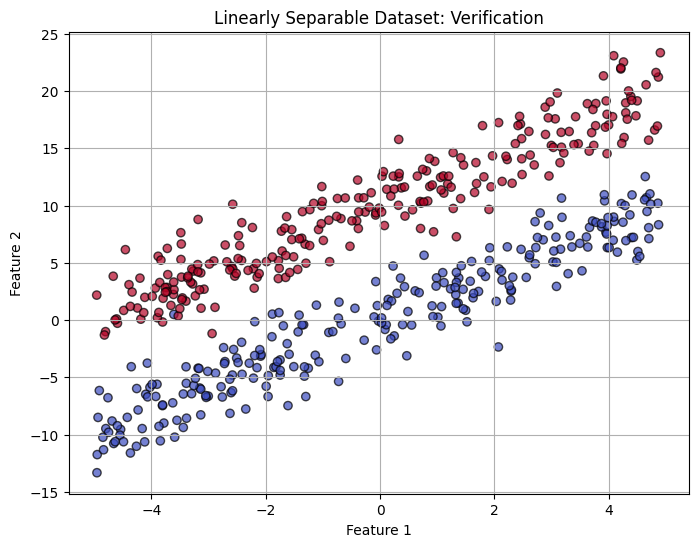

In [ ]:
# Visualize the dataset to verify linear separability
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.title("Linearly Separable Dataset: Verification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

---
***Comment***: we can see that classes can be split with one streight line between red and blue points without.

---


### 2. Training the model

In [24]:
# Import dataset
dataset = pd.read_csv("dataset/and.dat", sep=" ", header=None)

In [25]:
# Split independent and dependent variables
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [56]:
print(x.shape )
print(y.shape)

(500, 2)
(500,)


In [ ]:
model = PerceptronAlgorithm(eta=0.1, max_epochs=100, threshold=1e-4)

In [58]:
# Training
model.fit(x, y)

Epoch  1  ===> error =  0.01 ... 

Epoch  2  ===> error =  0.017 ... 

Epoch  3  ===> error =  0.012 ... 

Epoch  4  ===> error =  0.018 ... 

Epoch  5  ===> error =  0.011 ... 

Epoch  6  ===> error =  0.011 ... 

Epoch  7  ===> error =  0.01 ... 

Epoch  8  ===> error =  0.009 ... 

Epoch  9  ===> error =  0.008 ... 

Epoch  10  ===> error =  0.004 ... 

Epoch  11  ===> error =  0.009 ... 

Epoch  12  ===> error =  0.005 ... 

Epoch  13  ===> error =  0.004 ... 

Epoch  14  ===> error =  0.005 ... 

Epoch  15  ===> error =  0.004 ... 

Epoch  16  ===> error =  0.005 ... 

Epoch  17  ===> error =  0.013 ... 

Epoch  18  ===> error =  0.006 ... 

Epoch  19  ===> error =  0.005 ... 

Epoch  20  ===> error =  0.004 ... 

Epoch  21  ===> error =  0.005 ... 

Epoch  22  ===> error =  0.005 ... 

Epoch  23  ===> error =  0.006 ... 

Epoch  24  ===> error =  0.007 ... 

Epoch  25  ===> error =  0.006 ... 

Epoch  26  ===> error =  0.008 ... 

Epoch  27  ===> error =  0.008 ... 

Epoch  28  =

---
***Comment***: here we can see that errors are becoming smaller and smaller.

---

In [41]:
print("Loss = ", model.loss)
print("Cost = ", model.cost_)

Loss =  0.004
Cost =  [np.float64(0.009), np.float64(0.027), np.float64(0.01), np.float64(0.011), np.float64(0.01), np.float64(0.007), np.float64(0.017), np.float64(0.008), np.float64(0.014), np.float64(0.005), np.float64(0.005), np.float64(0.004), np.float64(0.005), np.float64(0.004), np.float64(0.007), np.float64(0.005), np.float64(0.004), np.float64(0.005), np.float64(0.005), np.float64(0.006), np.float64(0.005), np.float64(0.005), np.float64(0.007), np.float64(0.008), np.float64(0.006), np.float64(0.004), np.float64(0.006), np.float64(0.006), np.float64(0.007), np.float64(0.006), np.float64(0.007), np.float64(0.004), np.float64(0.005), np.float64(0.005), np.float64(0.006), np.float64(0.007), np.float64(0.006), np.float64(0.007), np.float64(0.005), np.float64(0.006), np.float64(0.004), np.float64(0.006), np.float64(0.004), np.float64(0.005), np.float64(0.006), np.float64(0.006), np.float64(0.008), np.float64(0.006), np.float64(0.007), np.float64(0.004), np.float64(0.006), np.float64

---
***Comment***:
1. Final loss is 0.004 that means that perceptron is making fewer errors or is closer to correctly classifying the training data.
2. The array shows the cost computed at each epoch during training. The gradual decrease in these values shows how the perceptron minimizes the cost over epochs as it adjusts the weights during training


---

## 3. Calculating metrics

In [43]:
import pandas as pd
from lesson4_scripts.classifiers import KNNModel
from lesson4_scripts.evaluator import EvalClassifier
from lesson4_scripts.deploy import DeployClassifier

#### Accuracy

In [59]:
# Make test
model.test(x, y)
print("Accuracy = ", model.accuracy, "%")

Accuracy =  94.8 %


---
***Comments:***
The accuracy is high and some misclassifications could be due to slight overlaps between classes.

---

In [45]:
# Predictions
y_pred = np.array([model.predict(sample) for sample in x])

#### Confusion matrix

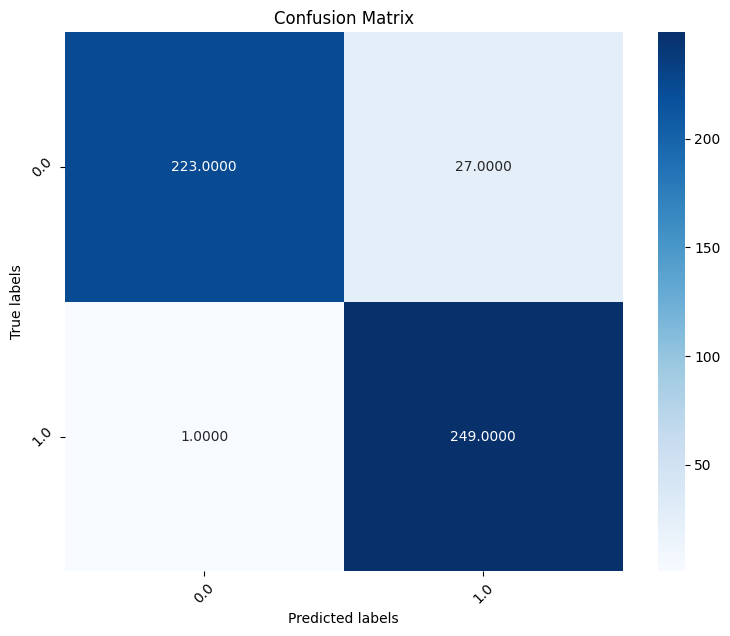

In [47]:
# Build Confusion Matrix
classes = np.unique(y)  # Classes (0 and 1)
evaluator = EvalClassifier(model)

# Generate confusion matrix
conf_matrix = evaluator.get_confusion_matrix(y_true=y, y_pred=y_pred, classes=classes)

# Plot confusion matrix
evaluator.plot_confusion_matrix(conf_matrix, classes=classes)

---
***Comment***:
We can see that the class 1 was missclassified only once and that the calss 0 - 27 times. Results of right classification are quite great.

---

#### Accuracy, pricision, recall, specificity, f1-score for class 0 and 1

In [60]:
# Metrics by class
metrics_by_class = evaluator.calculate_metrics_by_class(conf_matrix, classes)
print("Metrics by Class:")
print(metrics_by_class)

Metrics by Class:
     accuracy  precision  recall  specificity  f1-score
0.0     0.944   0.995536   0.892        0.996  0.940928
1.0     0.944   0.902174   0.996        0.892  0.946768


---
***Comment***:
1. Accuracy is the same for both 0 and 1
2. Precision is much higher for 0 (almost all predictions for class 0 are correct, with very few false positives and there are more false positives when predicting class 1.)
3. Recall 99.6% for class 1 shows that nearly all actual class 1 samples are identified correctly, with very few false negatives while there are more false negatives for class 0.
4. Most non-class 0 samples are correctly classified as not class 0 and there are more misclassifications of non-class 1 samples as class 1.
5. f1-score is 94.09%, balancing precision and recall for class 0, f1-score is 94.68% for class 1, slightly higher than class 0 due to its better recall performance.

---

#### Accuracy, pricision, recall, specificity, f1-score for all classes

In [50]:
# Mean metrics across all classes
metrics_xall = evaluator.calculate_metrics_xall(conf_matrix, metrics_by_class)
print("\nMean Metrics Across All Classes:")
print(metrics_xall)


Mean Metrics Across All Classes:
              accuracy  precision  recall  specificity  f1-score
Mean-metrics     0.944   0.948855   0.944        0.944  0.943848


---
***Comment***:
- The model demonstrates strong and balanced performance across all metrics, with mean accuracy, recall, and specificity at 94.4%. 
- Precision is slightly higher at 94.89%, indicating that predictions are reliable. 
- The F1-score of 94.38% confirms a good balance between precision and recall. 

Overall, the model is effective and consistent across both classes.

---

#### Classification metrics by class

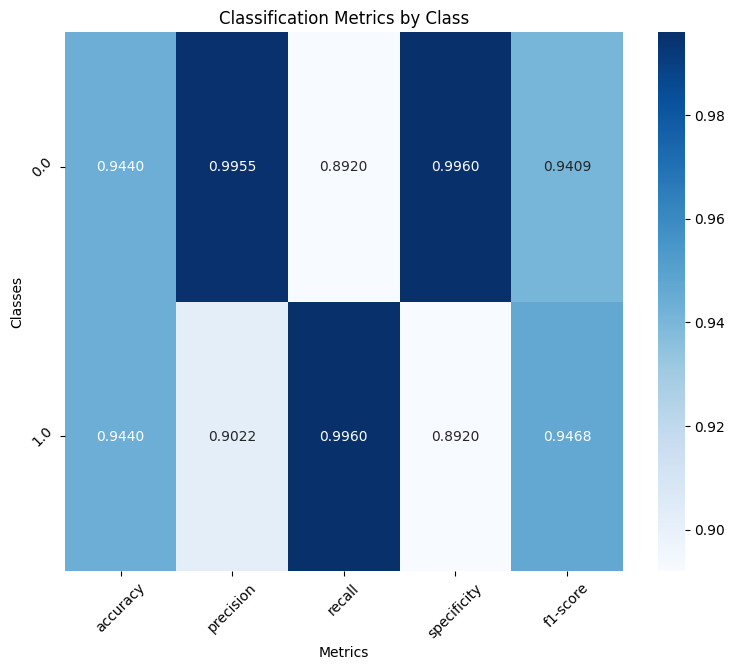

In [51]:
# Plot metrics by class
evaluator.plot_metrics_by_class(metrics_by_class, "Classification Metrics by Class")

---
***Comment***: here we can see the same results of alanization but visualized.

---

### Conclusion

The implemented perceptron algorithm effectively classified the linearly separable dataset, achieving a high accuracy of 94.8%. Performance metrics such as precision, recall, specificity, and F1-score indicate balanced and reliable predictions across both classes. These results validate the perceptron's ability to handle linearly separable data with strong performance and provide a solid foundation for further exploration with more complex datasets or algorithms.

